# Load all files from DataEDA3 and run Lasso

### Load all features and combine them

- Answers to 19 questions about managers

- manager demographics

### Run lasso regression 1000 times

- Split the data to test and train 1000 times and run lasso regression (with cross validation for the best alpha to use)

- Find the important features

- Save the combined features and the results from the lasso regression.

### Run Linear regression 1000 times
- Plot important features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import pickle

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

#happiness_dataset.to_pickle("./y.pkl")
#x_quest.to_pickle("./x_quest19.pkl")

In [65]:

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

In [4]:
current_path = "/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code"
print(current_path)

/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code


In [68]:
xx_dataset = pd.read_pickle("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/xx.pkl")
y_data = pd.read_pickle("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/y.pkl")
xx_quest = pd.read_pickle("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/x_quest19.pkl")

In [69]:
xx_quest=xx_quest.reset_index(drop=True)
xx_dataset=xx_dataset.reset_index(drop=True)
xx_dataset=xx_dataset.iloc[:, :-1]
xx_dataset

,Race1,Race2,Race3,Race4,Race5,Race6,Age,female,tenure,pay
0,0,0,0,0,0,1,1.33126,0.545481,0.179013,-0.0996565
1,0,0,0,0,0,1,0.0146793,0.545481,-0.769565,-0.0996565
2,0,0,0,0,0,1,0.419782,-1.83325,2.20098,-0.0996565
3,0,0,0,0,0,1,2.14147,-1.83325,-0.644752,-0.0996565
4,0,0,0,0,0,1,0.419782,0.545481,-0.120538,-0.0996565
...,...,...,...,...,...,...,...,...,...,...
7936,0,0,0,0,0,1,1.22999,0.545481,-0.81949,-0.293779
7937,0,0,0,0,0,1,0.419782,0.545481,-0.295276,0.404066
7938,0,0,0,0,0,1,1.33126,0.545481,-0.370164,-1.35681
7939,0,0,0,0,0,1,-0.795526,-1.83325,0.378714,0.765189


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
happiness_dataset = sc.fit_transform(y_data)
xx_quest[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", 
          "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
        "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]] = sc.fit_transform(xx_quest[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", 
          "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
        "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]])




In [83]:
xx=pd.concat([xx_dataset, xx_quest], axis=1)
xx.columns

Index(['Race1', 'Race2', 'Race3', 'Race4', 'Race5', 'Race6', 'Age', 'female',
       'tenure', 'pay', 'ti_6', 'ti_7', 'ti_9', 'ti_13', 'ti_14', 'ti_15',
       'ti_18', 'ti_19', 'ti_20', 'ti_21', 'ti_22', 'ti_24', 'ti_31', 'ti_34',
       'ti_39', 'ti_43', 'ti_46', 'ti_47', 'ti_54'],
      dtype='object')

## LASSO

In [72]:
# Try running the cross validation Lasso for different train test split and get the
#mean r-squared, alpha, and weights. 


xCV = xx
yCV = happiness_dataset

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
test_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number, xx.shape[1]))


for trialNo in range(train_number):
    
    #split 80-20
    XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

    reg = LassoCV(cv=5).fit(XCV_train, YCV_train)

    YpredLassoCV = reg.predict(XCV_test)
    test_r_squared[trialNo] = r2_score(YCV_test, YpredLassoCV)
    lasso_alpha[trialNo] = reg.alpha_
    lasso_coef[trialNo,:] = reg.coef_ 


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


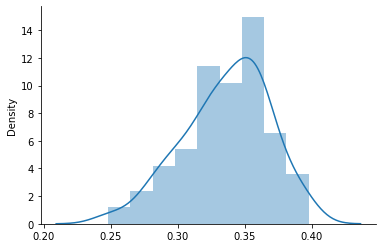

In [73]:
#Distribution of coefficient of determination
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()

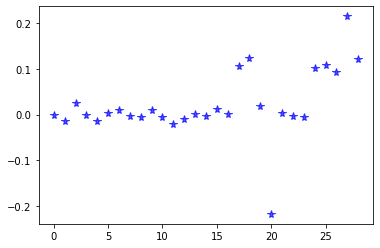

In [74]:
lasso_coef_df = pd.DataFrame(data=lasso_coef)

mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.7,linestyle='none',marker='*',markersize=8,color='blue') 

In [75]:
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.head()

20    0.217483
27    0.215557
18    0.124686
28    0.122922
25    0.108569
dtype: float64

In [76]:
#Choose top 5 features.

#all features.
all_features = xx

features_number = 5
#get the top n features
top_coef=abs_mean_coef.sort_values(ascending=False)

selected_features = all_features.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    selected_features = pd.concat([selected_features, all_features.iloc[:,top_coef.index[features+1]]], axis = 1)

    
x_linear = selected_features
y_linear = happiness_dataset

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(x_linear, y_linear, test_size=0.2)
    

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(Xl_train,Yl_train)
    
    
    Ypredl = linear_reg.predict(Xl_test)
    
    linear_r_squared[trialNo] = r2_score(Yl_test, Ypredl)
    linear_coef[trialNo,:] = linear_reg.coef_

In [77]:
selected_features

,ti_22,ti_47,ti_20,ti_54,ti_43
0,0.835334,0.727714,0.636134,0.851191,0.670647
1,-1.594775,-1.090655,-0.436608,-2.026336,-0.309406
2,0.835334,0.727714,0.636134,0.851191,0.670647
3,0.835334,0.727714,0.636134,0.851191,0.670647
4,0.025298,-0.181470,0.636134,-0.107984,-0.309406
...,...,...,...,...,...
7936,0.835334,0.727714,0.636134,0.851191,0.670647
7937,0.835334,0.727714,0.636134,0.851191,0.670647
7938,0.835334,0.727714,0.636134,0.851191,0.670647
7939,0.835334,0.727714,0.636134,0.851191,0.670647


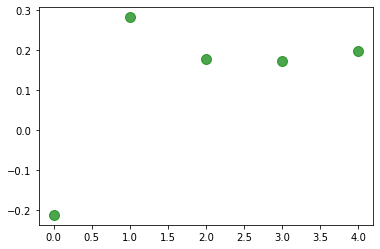

In [78]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='green') 

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


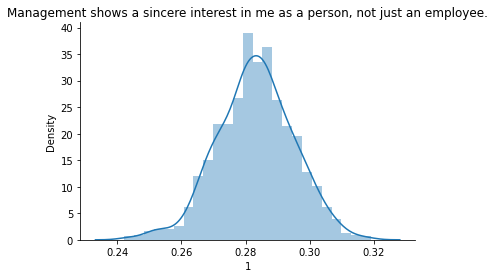

In [98]:
#Distribution of coefficients for the top feature (Managers avoid playing favorites.)
sb.distplot(linear_coef_df.iloc[:,1]).set_title('Management shows a sincere interest in me as a person, not just an employee.')
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


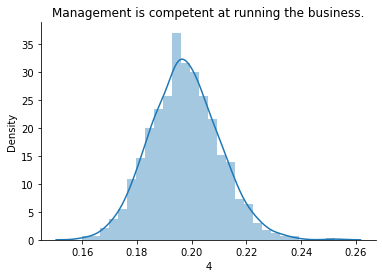

In [96]:
#Distribution of coefficients for the top feature (Management is competent at running the business.)
sb.distplot(linear_coef_df.iloc[:,4]).set_title('Management is competent at running the business.')
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


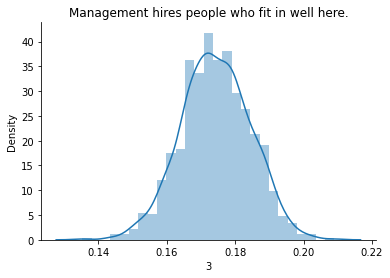

In [97]:
#Distribution of coefficients for the top feature (Management hires people who fit in well here..)
sb.distplot(linear_coef_df.iloc[:,3]).set_title('Management hires people who fit in well here.')
sb.despine()

In [99]:
accuracy=linear_r_squared.mean()
print(accuracy*100)

32.34691380895941
